In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from sklearn.metrics import r2_score

In [2]:
def read_data(f, cols, sep='[;,|_]', engine='python'):
    df = pd.read_csv(f, sep=sep, engine=engine, header=None)
    df.columns=cols
    return df

In [4]:
df = read_data('/Users/meghagodwal/Desktop/project 2_DS/SN_d_tot_V2.0.csv', 
              ['Year','Month','Day','Decimal_date','Sunspot_number','Daily_std','No_observation','Provisonal_indicator'])
df.head()

Year  Month  Day  Decimal_date  Sunspot_number  Daily_std  No_observation  \
0  1818      1    1      1818.001              -1       -1.0               0   
1  1818      1    2      1818.004              -1       -1.0               0   
2  1818      1    3      1818.007              -1       -1.0               0   
3  1818      1    4      1818.010              -1       -1.0               0   
4  1818      1    5      1818.012              -1       -1.0               0   

   Provisonal_indicator  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

In [5]:
x=df.iloc[:,[3,4,5,6,7]]
y=pd.to_datetime(df[['Year','Month','Day']])
z=pd.concat([y,x],axis=1)
z.columns=['Date','Decimal_date','Sunspot_number','Daily_std','No_observation','Provisonal_indicator']
z.rename(columns={'Date':'ds','Sunspot_number':'y'}, inplace=True)
z

ds  Decimal_date   y  Daily_std  No_observation  \
0     1818-01-01      1818.001  -1       -1.0               0   
1     1818-01-02      1818.004  -1       -1.0               0   
2     1818-01-03      1818.007  -1       -1.0               0   
3     1818-01-04      1818.010  -1       -1.0               0   
4     1818-01-05      1818.012  -1       -1.0               0   
...          ...           ...  ..        ...             ...   
74199 2021-02-24      2021.149  38        7.2              43   
74200 2021-02-25      2021.152  34        5.3              43   
74201 2021-02-26      2021.155  19        2.8              45   
74202 2021-02-27      2021.158  17        1.6              40   
74203 2021-02-28      2021.160  13        3.4              37   

       Provisonal_indicator  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1  
...                     ...  
74199                     0  
74200                     0  
74201                     0  
74202                     0  
74203                     0  

[74204 rows x 6 columns]

### Removing the missing data from y

In [6]:
df2 = z[(z[['y']] != -1).all(axis=1)]
df2

ds  Decimal_date    y  Daily_std  No_observation  \
7     1818-01-08      1818.021   65       10.2               1   
12    1818-01-13      1818.034   37        7.7               1   
16    1818-01-17      1818.045   77       11.1               1   
17    1818-01-18      1818.048   98       12.6               1   
18    1818-01-19      1818.051  105       13.0               1   
...          ...           ...  ...        ...             ...   
74199 2021-02-24      2021.149   38        7.2              43   
74200 2021-02-25      2021.152   34        5.3              43   
74201 2021-02-26      2021.155   19        2.8              45   
74202 2021-02-27      2021.158   17        1.6              40   
74203 2021-02-28      2021.160   13        3.4              37   

       Provisonal_indicator  
7                         1  
12                        1  
16                        1  
17                        1  
18                        1  
...                     ...  
74199                     0  
74200                     0  
74201                     0  
74202                     0  
74203                     0  

[70957 rows x 6 columns]

### Removing all other columns 

In [7]:
df_daily_with_outlier = df2.drop(columns=['Decimal_date', 'Daily_std','No_observation','Provisonal_indicator'])
df_daily_with_outlier

ds    y
7     1818-01-08   65
12    1818-01-13   37
16    1818-01-17   77
17    1818-01-18   98
18    1818-01-19  105
...          ...  ...
74199 2021-02-24   38
74200 2021-02-25   34
74201 2021-02-26   19
74202 2021-02-27   17
74203 2021-02-28   13

[70957 rows x 2 columns]

### Fitting the model

In [8]:
model_daily_with_outlier = Prophet()
model_daily_with_outlier.fit(df_daily_with_outlier)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future_daily_with_outlier = model_daily_with_outlier.make_future_dataframe(periods=0, freq='d', include_history = True)
forecast_daily_with_outlier = model_daily_with_outlier.predict(future_daily_with_outlier)
forecast_daily_with_outlier

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0     1818-01-08  14.121751  -78.972928  102.797328    14.121751    14.121751   
1     1818-01-13  14.185907  -79.234401   96.075970    14.185907    14.185907   
2     1818-01-17  14.237231  -76.260195   94.324487    14.237231    14.237231   
3     1818-01-18  14.250062  -80.587654   94.690671    14.250062    14.250062   
4     1818-01-19  14.262893  -79.197723  100.982766    14.262893    14.262893   
...          ...        ...         ...         ...          ...          ...   
70952 2021-02-24  26.512362  -58.329700  117.031261    26.512362    26.512362   
70953 2021-02-25  26.504854  -61.890086  122.149001    26.504854    26.504854   
70954 2021-02-26  26.497346  -60.310034  121.604177    26.497346    26.497346   
70955 2021-02-27  26.489838  -56.389111  115.565500    26.489838    26.489838   
70956 2021-02-28  26.482330  -64.721754  110.568390    26.482330    26.482330   

       additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0           -4.907073             -4.907073             -4.907073  0.084318   
1           -4.799019             -4.799019             -4.799019  0.022237   
2           -4.267815             -4.267815             -4.267815 -0.035017   
3           -4.141312             -4.141312             -4.141312 -0.102186   
4           -3.739727             -3.739727             -3.739727  0.091609   
...               ...                   ...                   ...       ...   
70952        0.699548              0.699548              0.699548  0.148227   
70953        0.536904              0.536904              0.536904  0.084318   
70954        0.138076              0.138076              0.138076 -0.209188   
70955        0.202152              0.202152              0.202152 -0.035017   
70956        0.022012              0.022012              0.022012 -0.102186   

       weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0          0.084318      0.084318 -4.991392     -4.991392     -4.991392   
1          0.022237      0.022237 -4.821256     -4.821256     -4.821256   
2         -0.035017     -0.035017 -4.232797     -4.232797     -4.232797   
3         -0.102186     -0.102186 -4.039126     -4.039126     -4.039126   
4          0.091609      0.091609 -3.831335     -3.831335     -3.831335   
...             ...           ...       ...           ...           ...   
70952      0.148227      0.148227  0.551321      0.551321      0.551321   
70953      0.084318      0.084318  0.452586      0.452586      0.452586   
70954     -0.209188     -0.209188  0.347264      0.347264      0.347264   
70955     -0.035017     -0.035017  0.237169      0.237169      0.237169   
70956     -0.102186     -0.102186  0.124198      0.124198      0.124198   

       multiplicative_terms  multiplicative_terms_lower  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   
...                     ...                         ...   
70952                   0.0                         0.0   
70953                   0.0                         0.0   
70954                   0.0                         0.0   
70955                   0.0                         0.0   
70956                   0.0                         0.0   

       multiplicative_terms_upper       yhat  
0                             0.0   9.214677  
1                             0.0   9.386887  
2                             0.0   9.969416  
3                             0.0  10.108750  
4                             0.0  10.523167  
...                           ...        ...  
70952                         0.0  27.211910  
70953                         0.0  27.041758  
70954                         0.0  26.635422  
70955       

### Outlier detection and removal

In [10]:
def remove_outliers(forecast, df):
    # detect outliers
    forecast["outlier"] = 0
    forecast["y"] = df["y"].reset_index(drop = True)
    forecast.loc[(forecast['y'] > forecast['yhat_upper']+3), 'outlier'] = -1
    forecast.loc[(forecast['y'] < forecast['yhat_lower']-3), 'outlier'] = -1
    print("Outliers: ", len(forecast[forecast['outlier'] == -1]))
    print("Total: ", len(df))
    print("Remaining: ", (len(df)-len(forecast[forecast['outlier'] == -1])))
    
    # remove outliers
    forecast = forecast[forecast['outlier'] == 0].reset_index(drop = True)
    return forecast

In [11]:
df_daily_without_outlier = remove_outliers(forecast_daily_with_outlier, df_daily_with_outlier)

Outliers:  11590
Total:  70957
Remaining:  59367


### Refitting the data

In [14]:
model_daily_without_outlier = Prophet(daily_seasonality = True)
model_daily_without_outlier.fit(df_daily_without_outlier)

In [15]:
future_daily_without_outlier = model_daily_without_outlier.make_future_dataframe(periods=0, freq='d', include_history = True)
forecast_daily_without_outlier = model_daily_without_outlier.predict(future_daily_without_outlier)
forecast_daily_without_outlier

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0     1818-01-08  53.033837  -50.429890   70.273270    53.033837    53.033837   
1     1818-01-13  53.080560  -51.219972   72.945593    53.080560    53.080560   
2     1818-01-17  53.117938  -43.720383   71.501552    53.117938    53.117938   
3     1818-01-25  53.192695  -44.096902   71.721878    53.192695    53.192695   
4     1818-01-28  53.220729  -42.060319   74.896470    53.220729    53.220729   
...          ...        ...         ...         ...          ...          ...   
59362 2021-02-24  56.628890  -41.591561   79.672120    56.628890    56.628890   
59363 2021-02-25  56.622086  -36.438800   82.147200    56.622086    56.622086   
59364 2021-02-26  56.615283  -41.509595   84.291552    56.615283    56.615283   
59365 2021-02-27  56.608479  -36.307714   81.454518    56.608479    56.608479   
59366 2021-02-28  56.601675  -37.926068   79.121097    56.601675    56.601675   

       additive_terms  additive_terms_lower  additive_terms_upper      daily  \
0          -41.083624            -41.083624            -41.083624 -36.511775   
1          -41.256881            -41.256881            -41.256881 -36.511775   
2          -40.584341            -40.584341            -40.584341 -36.511775   
3          -38.965394            -38.965394            -38.965394 -36.511775   
4          -38.477670            -38.477670            -38.477670 -36.511775   
...               ...                   ...                   ...        ...   
59362      -34.678414            -34.678414            -34.678414 -36.511775   
59363      -34.920694            -34.920694            -34.920694 -36.511775   
59364      -34.044946            -34.044946            -34.044946 -36.511775   
59365      -34.631353            -34.631353            -34.631353 -36.511775   
59366      -34.429213            -34.429213            -34.429213 -36.511775   

       ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0      ... -0.304024     -0.304024     -0.304024 -4.267826     -4.267826   
1      ... -0.415659     -0.415659     -0.415659 -4.329448     -4.329448   
2      ...  0.006318      0.006318      0.006318 -4.078884     -4.078884   
3      ...  0.216552      0.216552      0.216552 -2.670172     -2.670172   
4      ... -0.072631     -0.072631     -0.072631 -1.893264     -1.893264   
...    ...       ...           ...           ...       ...           ...   
59362  ... -0.072631     -0.072631     -0.072631  1.905992      1.905992   
59363  ... -0.304024     -0.304024     -0.304024  1.895104      1.895104   
59364  ...  0.582736      0.582736      0.582736  1.884093      1.884093   
59365  ...  0.006318      0.006318      0.006318  1.874103      1.874103   
59366  ...  0.216552      0.216552      0.216552  1.866009      1.866009   

       yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         -4.267826                   0.0                         0.0   
1         -4.329448                   0.0                         0.0   
2         -4.078884                   0.0                         0.0   
3         -2.670172                   0.0                         0.0   
4         -1.893264                   0.0                         0.0   
...             ...                   ...                         ...   
59362      1.905992                   0.0                         0.0   
59363      1.895104                   0.0                         0.0   
59364      1.884093                   0.0                         0.0   
59365      1.874103                   0.0                         0.0   
59366      1.866009                   0.0                         0.0   

       multiplicative_terms_upper       yhat  
0                             0.0  11.950213  
1                             0.0  11.823679  
2                             0.0  12.533598  
3                             0.0  14.227301  
4                             0.0  14.743059  
...     

# Linear Model

In [16]:
m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
            n_changepoints = 25,
            interval_width = 1.0,
            changepoint_range = 0.8,
            changepoint_prior_scale = 30.0,
            seasonality_prior_scale= 20.0 )

model_daily_without_outlier = m.fit(df_daily_without_outlier)

In [17]:
def daily_forecasting(model, period):
    future = model_daily_without_outlier.make_future_dataframe(periods=period, freq='d', include_history = True)
    forecast = model_daily_without_outlier.predict(future)
    fig = model_daily_without_outlier.plot(forecast, xlabel = "Date", ylabel = "Sunspot Number", figsize = (15,10))
    a= add_changepoints_to_plot(fig.gca(),model_daily_without_outlier,forecast)
    fig1=model_daily_without_outlier.plot_components(forecast, figsize=(15,15))

## 100 day forecast

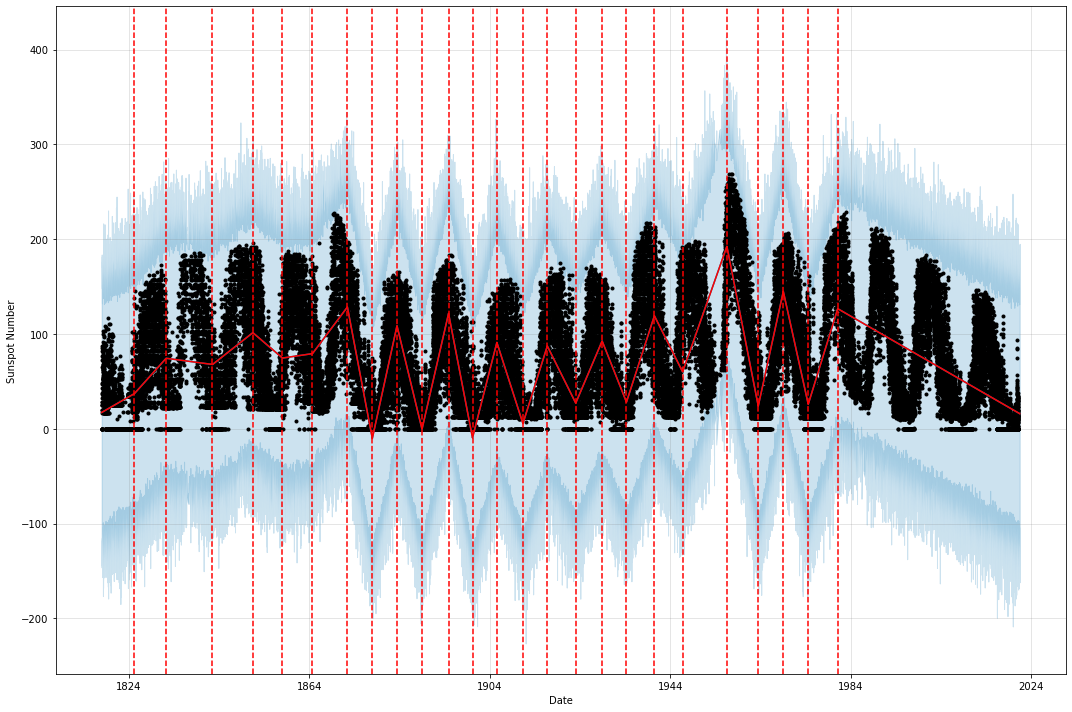

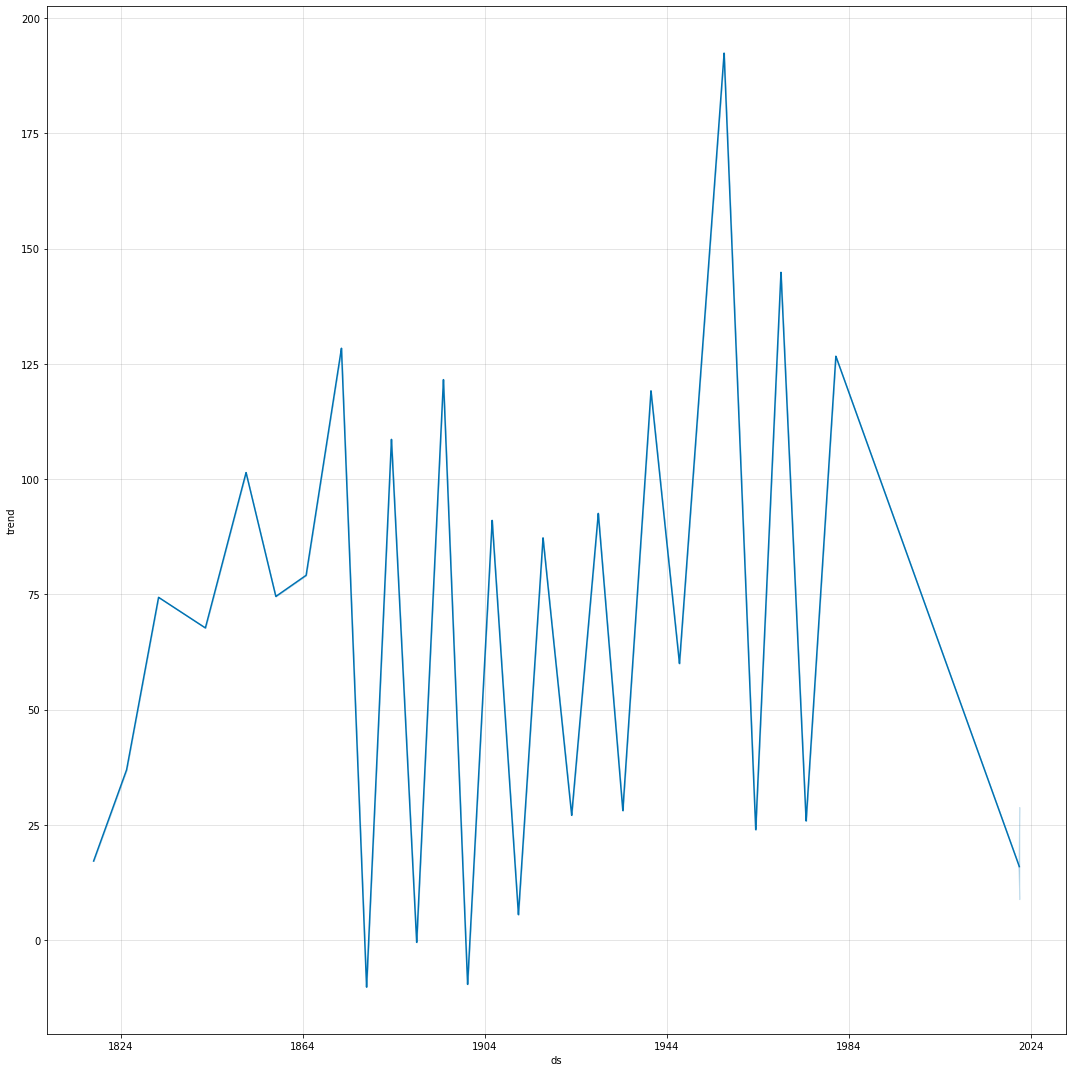

In [18]:
forecast_daily_100 = daily_forecasting(model_daily_without_outlier, 100)

### Cross validation and performance metrics

In [19]:
df_100_daily_cv = cross_validation(model_daily_without_outlier, initial='73000 days', period='30 days', horizon = '60 days', parallel = 'processes')

INFO:prophet:Making 38 forecasts with cutoffs between 2017-12-16 00:00:00 and 2020-12-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ffcf4eacc40>


In [20]:
df_100_daily_perf = performance_metrics(df_100_daily_cv)
df_100_daily_perf .head()

INFO:prophet:Skipping MAPE because y close to 0


horizon         mse       rmse        mae  mdape     smape  coverage
0  6 days  802.840891  28.334447  26.386511    inf  1.490327       1.0
1  7 days  803.089419  28.338832  26.315845    inf  1.495310       1.0
2  8 days  797.715859  28.243864  26.114754    inf  1.492847       1.0
3  9 days  794.196634  28.181495  25.992723    inf  1.504389       1.0
4 10 days  802.749706  28.332838  26.089537    inf  1.521689       1.0

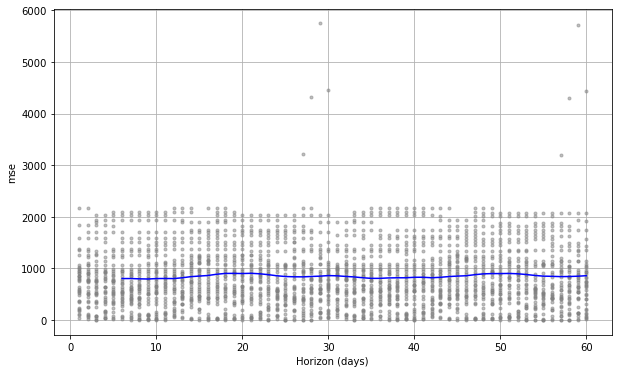

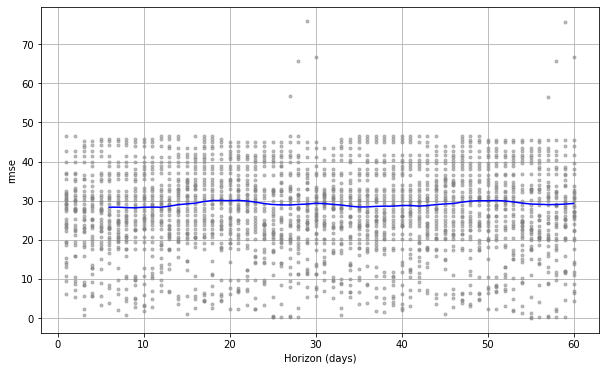

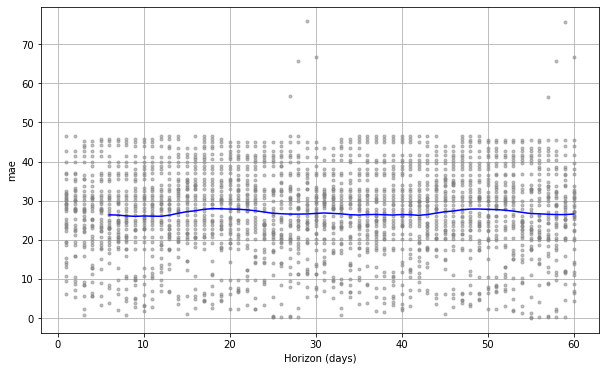

In [21]:
plt_mse = plot_cross_validation_metric(df_100_daily_cv, metric='mse')

plt_rmse = plot_cross_validation_metric(df_100_daily_cv, metric='rmse')

plt_mae = plot_cross_validation_metric(df_100_daily_cv, metric='mae')

#plt_mape = plot_cross_validation_metric(df_100_daily_cv, metric='mape')

In [22]:
r2_100_daily= r2_score(df_100_daily_cv['y'], df_100_daily_cv['yhat'])
print('R2 Score :')
r2_100_daily

R2 Score :


-6.284408961702612

## 200 days forecast

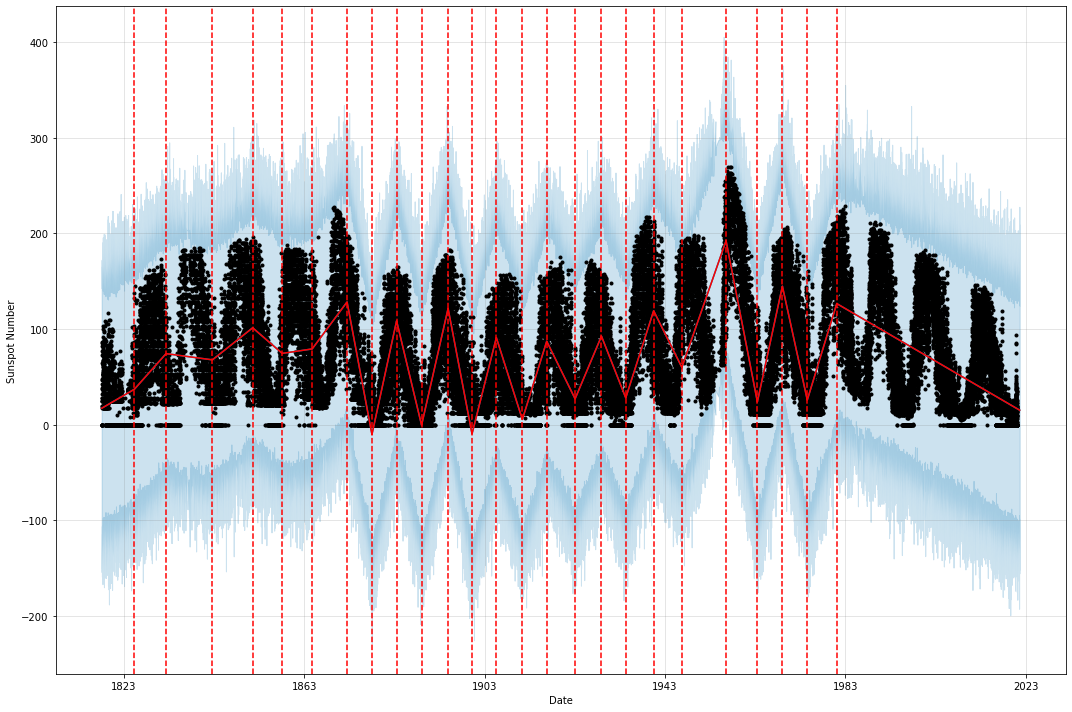

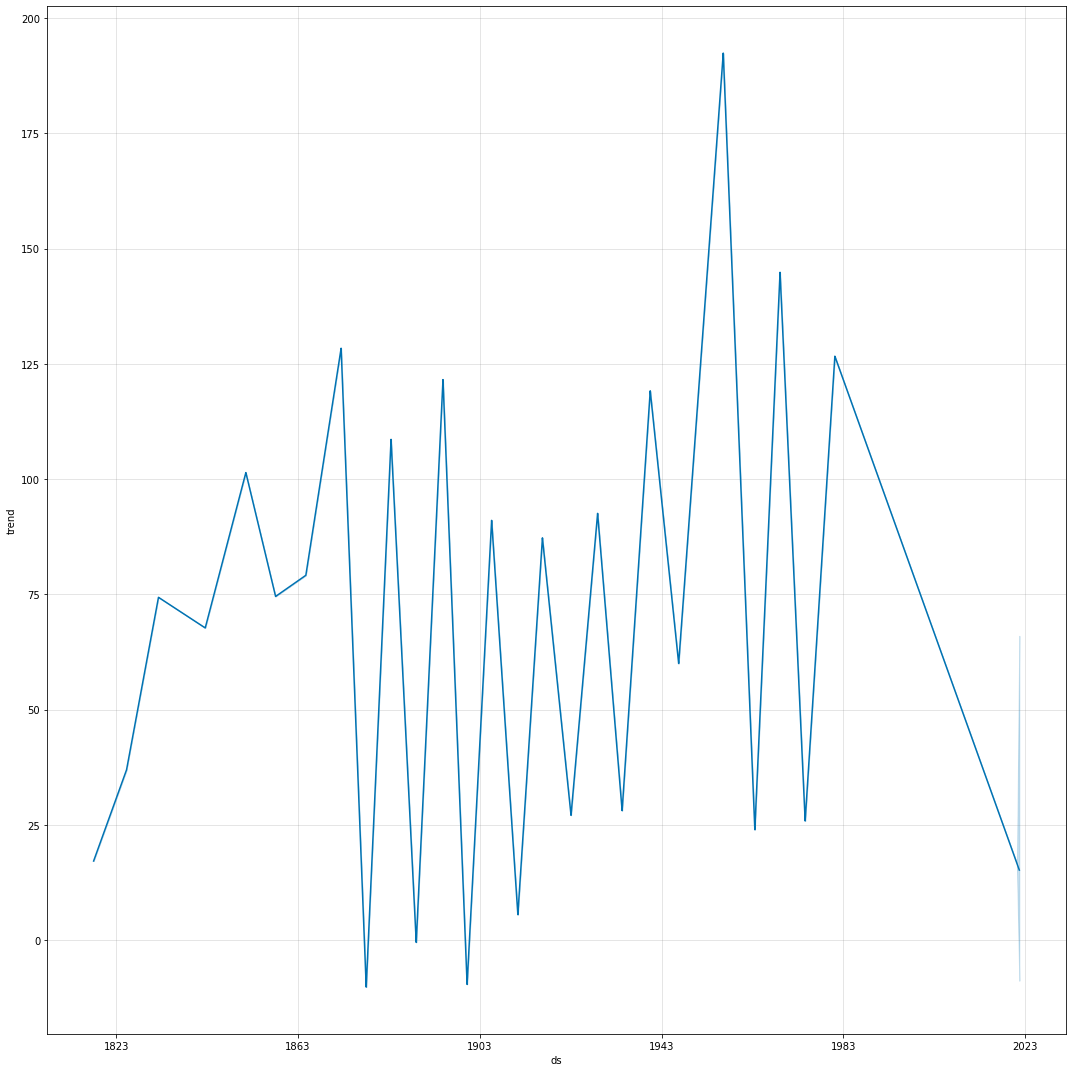

In [23]:
forecast_daily_200 = daily_forecasting(model_daily_without_outlier, 200)

### Cross validation and performance metrics

In [28]:
df_200_daily_cv = cross_validation(model_daily_without_outlier, initial='73500 days', period='50 days', horizon = '100 days', parallel = 'processes')

INFO:prophet:Making 12 forecasts with cutoffs between 2019-05-20 00:00:00 and 2020-11-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ffcf90dcc10>


In [29]:
df_200_daily_perf = performance_metrics(df_200_daily_cv)
df_200_daily_perf .head()

INFO:prophet:Skipping MAPE because y close to 0


horizon         mse       rmse        mae  mdape     smape  coverage
0 10 days  738.705774  27.179142  24.947219    inf  1.667785       1.0
1 11 days  749.145310  27.370519  25.200380    inf  1.674594       1.0
2 12 days  756.616598  27.506665  25.386874    inf  1.688219       1.0
3 13 days  754.395320  27.466258  25.365036    inf  1.688992       1.0
4 14 days  758.739569  27.545228  25.409863    inf  1.692120       1.0

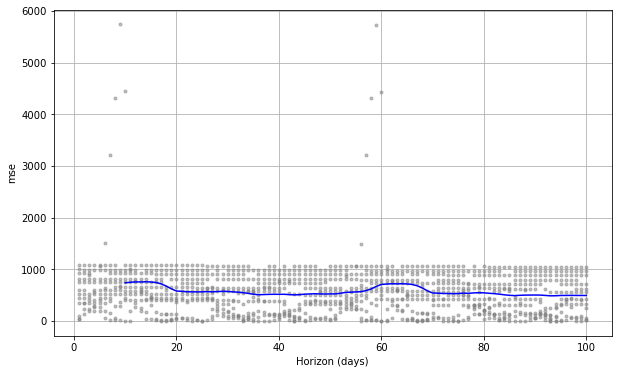

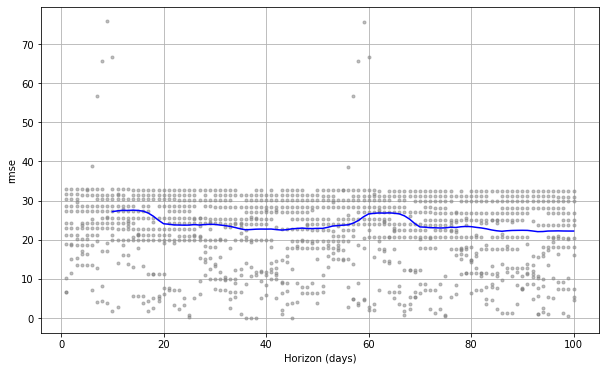

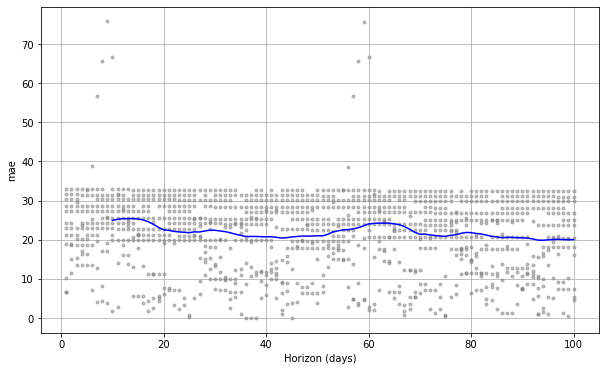

In [30]:
plt_mse = plot_cross_validation_metric(df_200_daily_cv, metric='mse')

plt_rmse = plot_cross_validation_metric(df_200_daily_cv, metric='rmse')

plt_mae = plot_cross_validation_metric(df_200_daily_cv, metric='mae')

#plt_mape = plot_cross_validation_metric(df_200_daily_cv, metric='mape')

In [31]:
r2_200_daily= r2_score(df_200_daily_cv['y'], df_200_daily_cv['yhat'])
print('R2 Score :')
r2_200_daily

R2 Score :


-3.0944933607863065

## 365 days forecast

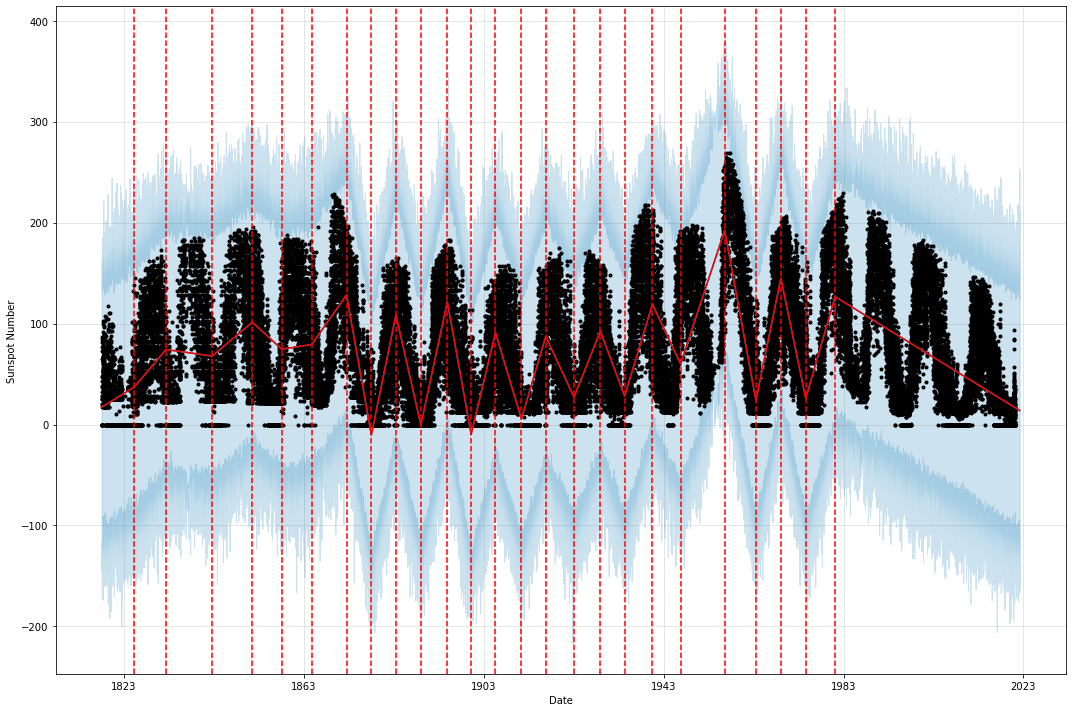

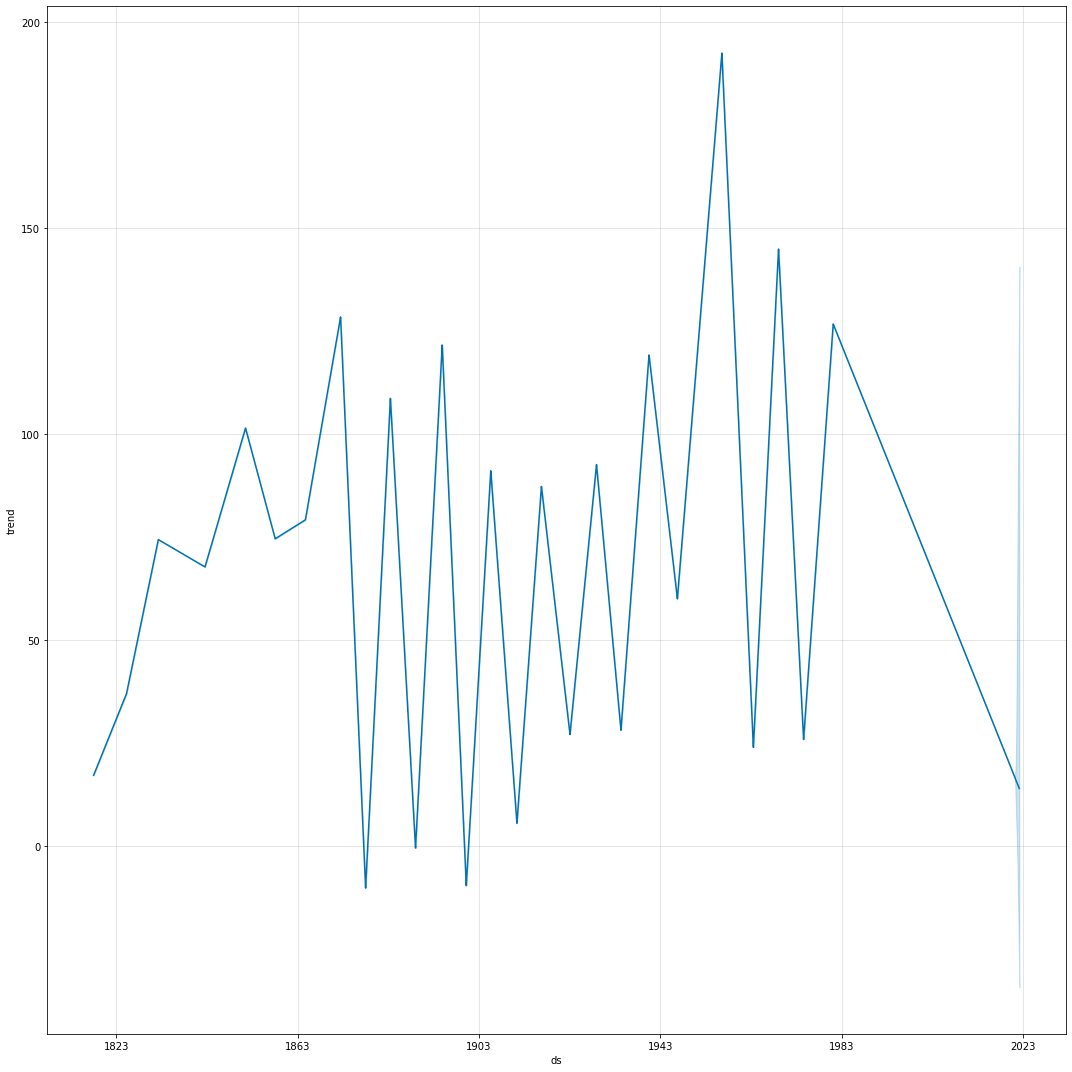

In [32]:
forecast_daily_365 = daily_forecasting(model_daily_without_outlier, 365)

### Cross validation and performance metrics

In [33]:
df_365_daily_cv = cross_validation(model_daily_without_outlier, initial='71000 days', period='130 days', horizon = '365 days', parallel = 'processes')

INFO:prophet:Making 22 forecasts with cutoffs between 2012-09-08 00:00:00 and 2020-02-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ffe418b1790>


In [34]:
df_365_daily_perf = performance_metrics(df_365_daily_cv)
df_365_daily_perf .head()

INFO:prophet:Skipping MAPE because y close to 0


horizon          mse       rmse        mae     mdape     smape  coverage
0 37 days  1117.794553  33.433435  28.573856  0.611856  0.888710       1.0
1 38 days  1131.837999  33.642800  28.716470  0.611856  0.888311       1.0
2 39 days  1156.758015  34.011145  29.051228  0.611856  0.895251       1.0
3 40 days  1177.710502  34.317787  29.332247  0.634224  0.904266       1.0
4 41 days  1194.743715  34.565065  29.568642  0.627486  0.912829       1.0

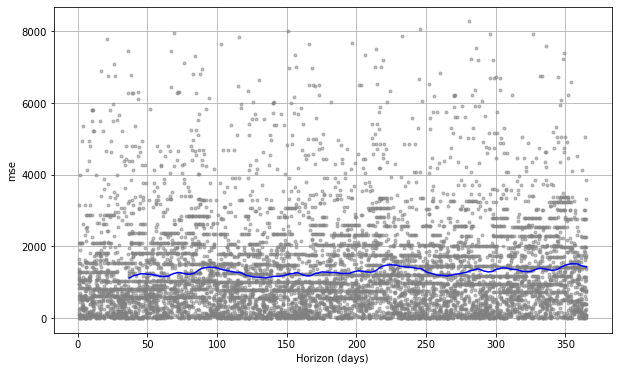

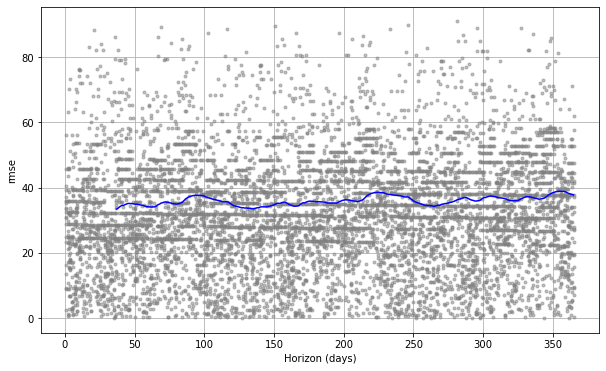

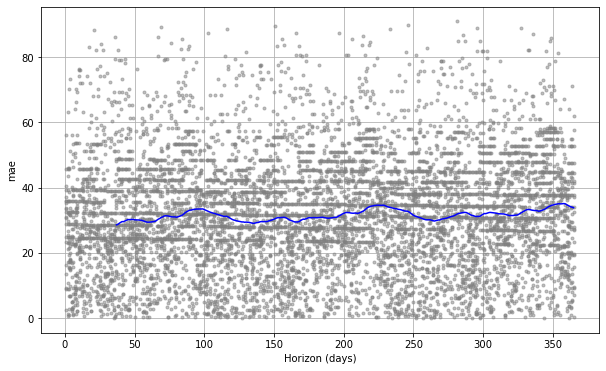

In [35]:
plt_mse = plot_cross_validation_metric(df_365_daily_cv, metric='mse')

plt_rmse = plot_cross_validation_metric(df_365_daily_cv, metric='rmse')

plt_mae = plot_cross_validation_metric(df_365_daily_cv, metric='mae')

#plt_mape = plot_cross_validation_metric(df_365_daily_cv, metric='mape')

In [36]:
r2_365_daily= r2_score(df_365_daily_cv['y'], df_365_daily_cv['yhat'])
print('R2 Score :')
r2_365_daily

R2 Score :


0.178485346400173

# Logistic Model

In [37]:
cap = 220
floor = -100
df_daily_without_outlier['cap'] = cap
df_daily_without_outlier['floor'] = floor
m_logistic = Prophet(daily_seasonality = True, yearly_seasonality = False, weekly_seasonality = False,
            seasonality_mode = 'additive',
            growth = 'logistic',
            n_changepoints = 25,
            interval_width = 1.0,
            changepoint_range = 0.8,
            changepoint_prior_scale = 0.5,
            seasonality_prior_scale= 20.0 )
m_logistic.add_seasonality(name='daily', period=1, fourier_order=5)

m_logistic.fit(df_daily_without_outlier)

## 100 day forecast

In [38]:
future_100_logistic = m_logistic.make_future_dataframe(periods=100, freq='d', include_history = True)
future_100_logistic['cap'] = cap
future_100_logistic['floor'] = floor
forecast_100_logistic= m_logistic.predict(future_100_logistic)
forecast_100_logistic[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
59462 2021-06-04  18.005682 -156.783150  166.827725
59463 2021-06-05  17.998989 -131.153724  153.800473
59464 2021-06-06  17.992296 -119.413505  150.982373
59465 2021-06-07  17.985603 -118.863671  142.365586
59466 2021-06-08  17.978910 -126.995878  154.193855

In [39]:
def seasonality(df, future, name, period, fourier_order):
    model = Prophet(weekly_seasonality=False)
    model.add_seasonality(name=name, period=period, fourier_order=fourier_order)
    forecast = model.fit(df).predict(future)
    fig = model.plot_components(forecast)

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


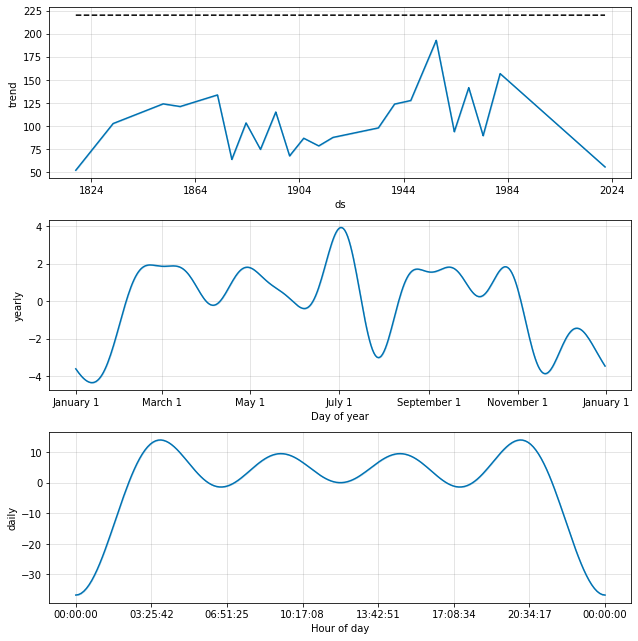

In [40]:
seasonality(df_daily_without_outlier, future_100_logistic, 'daily', 1, 4)

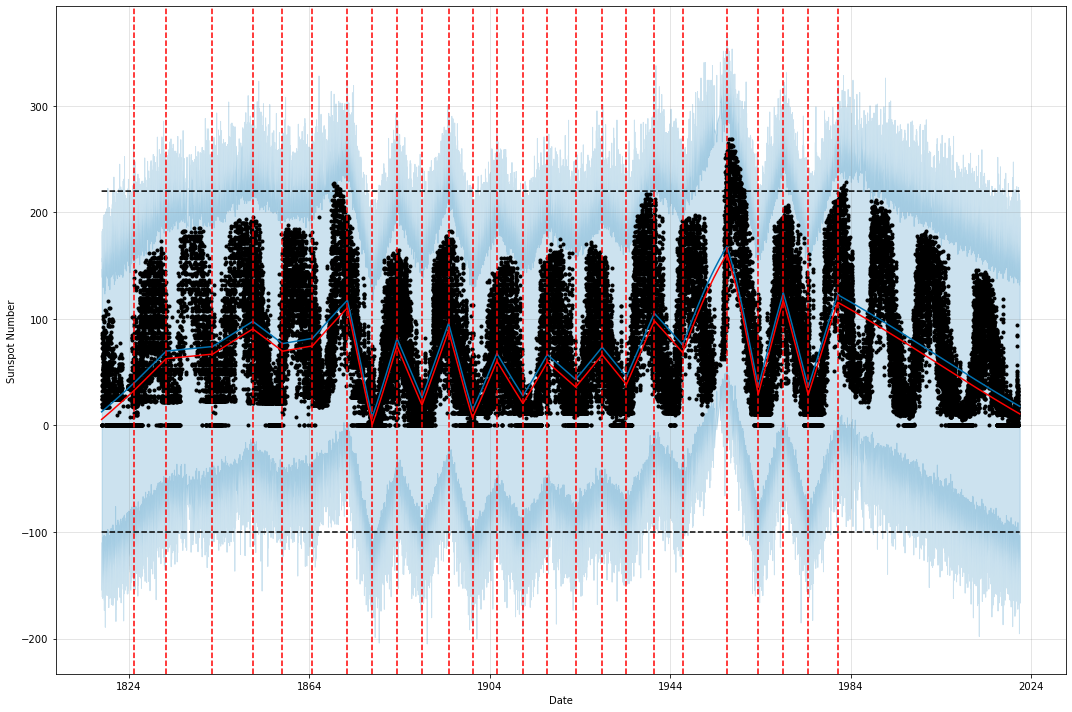

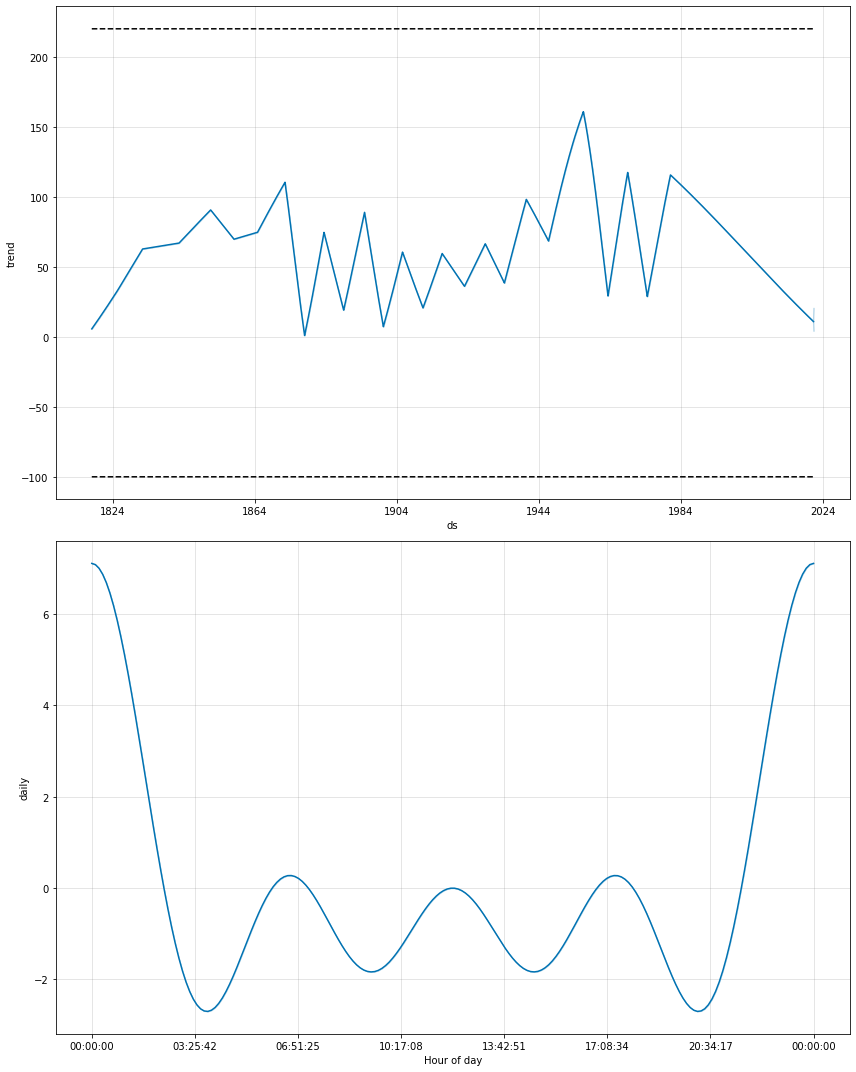

In [41]:
fig = m_logistic.plot(forecast_100_logistic, xlabel = "Date", ylabel = "Sunspot Number", figsize = (15,10))
a= add_changepoints_to_plot(fig.gca(),m_logistic,forecast_100_logistic)
fig1=m_logistic.plot_components(forecast_100_logistic, figsize=(12,15))

### Cross validation and performance metrics

In [42]:
df_100_daily_logistic_cv = cross_validation(m_logistic, initial='73000 days', period='100 days', horizon = '365 days', parallel = 'processes')

INFO:prophet:Making 9 forecasts with cutoffs between 2017-12-21 00:00:00 and 2020-02-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ffe3af46730>


In [43]:
df_100_daily_logistic_perf = performance_metrics(df_100_daily_logistic_cv)
df_100_daily_logistic_perf.head()

INFO:prophet:Skipping MAPE because y close to 0


horizon          mse       rmse        mae  mdape     smape  coverage
0 37 days  1156.500702  34.007362  33.002597    inf  1.691376       1.0
1 38 days  1160.196645  34.061659  33.095993    inf  1.696952       1.0
2 39 days  1159.535541  34.051954  33.123333    inf  1.697711       1.0
3 40 days  1161.011674  34.073621  33.184548    inf  1.700737       1.0
4 41 days  1161.509228  34.080922  33.218662    inf  1.702004       1.0

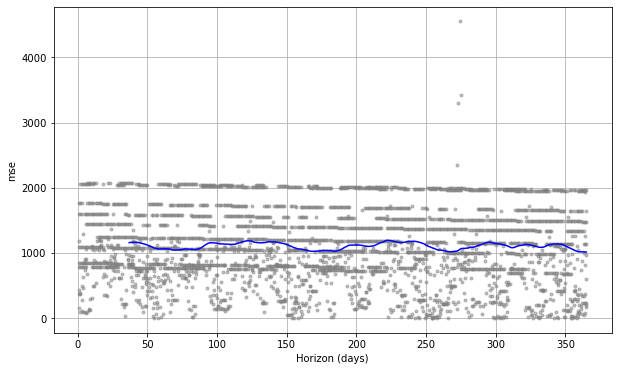

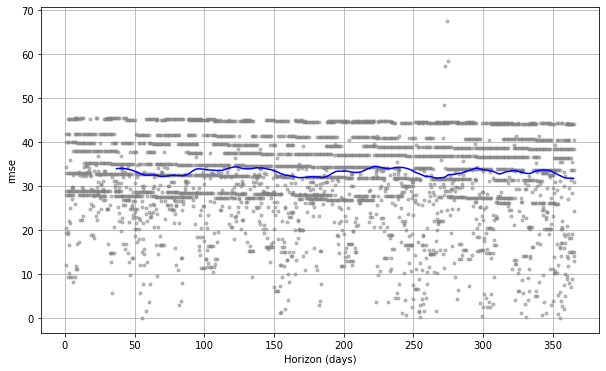

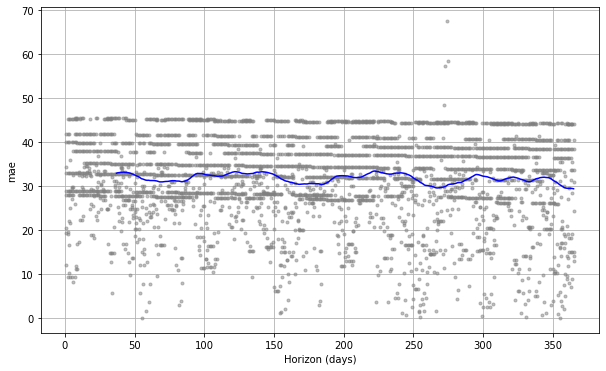

In [44]:
plt_mse = plot_cross_validation_metric(df_100_daily_logistic_cv, metric='mse')

plt_rmse = plot_cross_validation_metric(df_100_daily_logistic_cv, metric='rmse')

plt_mae = plot_cross_validation_metric(df_100_daily_logistic_cv, metric='mae')

#plt_mape = plot_cross_validation_metric(df_100_daily_logistic_cv, metric='mape')

In [45]:
r2_100_daily_logistic= r2_score(df_100_daily_logistic_cv['y'], df_100_daily_logistic_cv['yhat'])
print('R2 score for logistic model :')
r2_100_daily_logistic

R2 score for logistic model :


-12.452663008339632

## 200 forecast

In [46]:
future_200_logistic = m_logistic.make_future_dataframe(periods=200, freq='d', include_history = True)
future_200_logistic['cap'] = cap
future_200_logistic['floor'] = floor
forecast_200_logistic= m_logistic.predict(future_200_logistic)
forecast_200_logistic[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
59562 2021-09-12  17.337294 -149.378170  185.240116
59563 2021-09-13  17.330620 -125.137148  178.098204
59564 2021-09-14  17.323946 -128.963466  189.750773
59565 2021-09-15  17.317272 -150.350296  141.629674
59566 2021-09-16  17.310598 -127.068348  142.340065

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


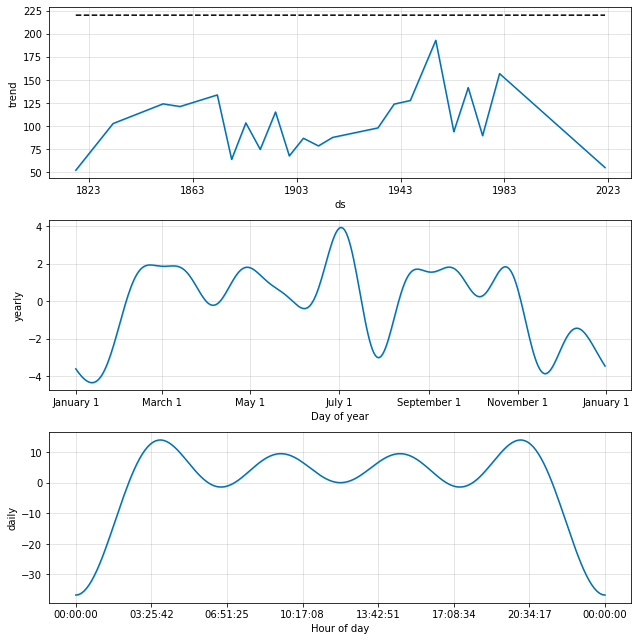

In [47]:
seasonality(df_daily_without_outlier, future_200_logistic, 'daily', 1, 4)

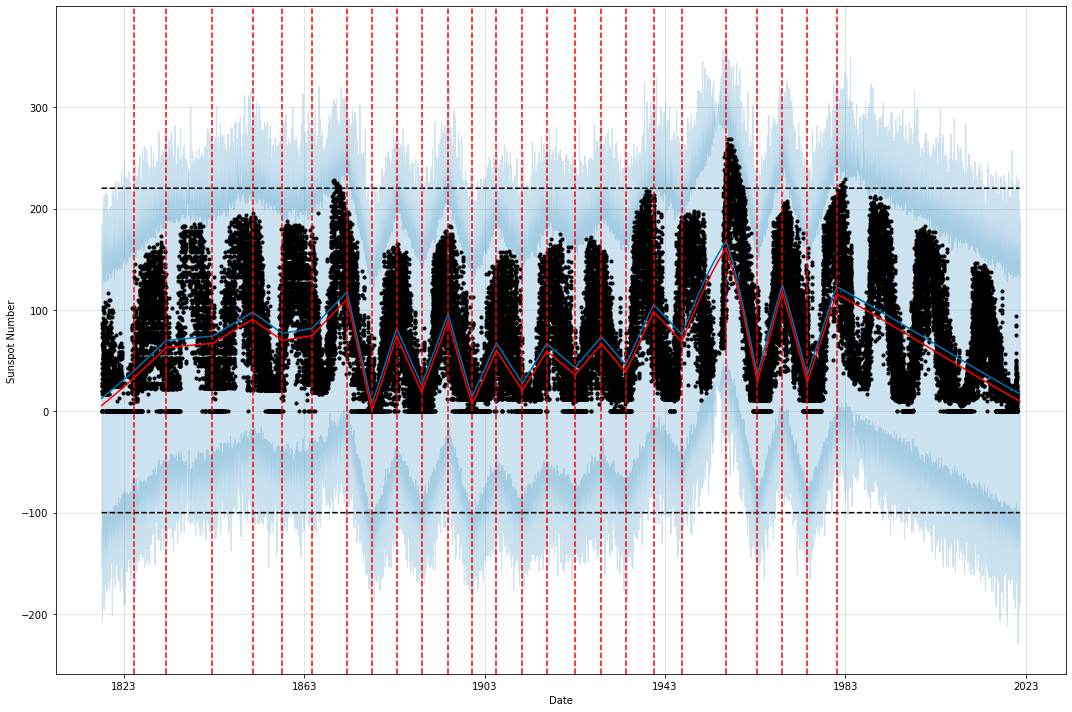

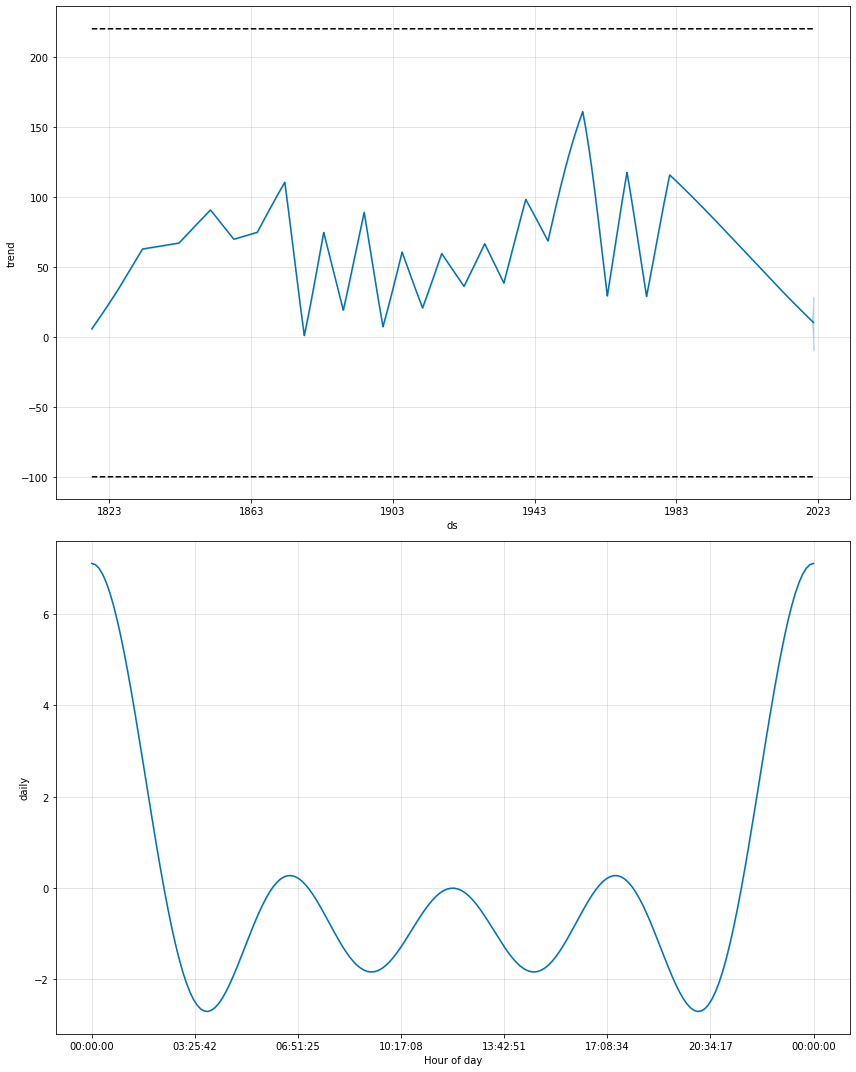

In [48]:
fig = m_logistic.plot(forecast_200_logistic, xlabel = "Date", ylabel = "Sunspot Number", figsize = (15,10))
a= add_changepoints_to_plot(fig.gca(),m_logistic,forecast_200_logistic)
fig1=m_logistic.plot_components(forecast_200_logistic, figsize=(12,15))

### Cross validation and performance metrics

In [50]:
df_200_daily_logistic_cv = cross_validation(m_logistic, initial='73000 days', period='180 days', horizon = '365 days', parallel = 'processes')

INFO:prophet:Making 5 forecasts with cutoffs between 2018-03-11 00:00:00 and 2020-02-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ffe3d9aba60>


In [51]:
df_200_daily_logistic_perf = performance_metrics(df_200_daily_logistic_cv)
df_200_daily_logistic_perf.head()

INFO:prophet:Skipping MAPE because y close to 0


horizon          mse       rmse        mae  mdape     smape  coverage
0 37 days  1059.551082  32.550746  31.381756    inf  1.639191       1.0
1 38 days  1058.527972  32.535027  31.359503    inf  1.638802       1.0
2 39 days  1056.864160  32.509447  31.337250    inf  1.638035       1.0
3 40 days  1050.914408  32.417810  31.257854    inf  1.632888       1.0
4 41 days  1046.861494  32.355239  31.186151    inf  1.630397       1.0

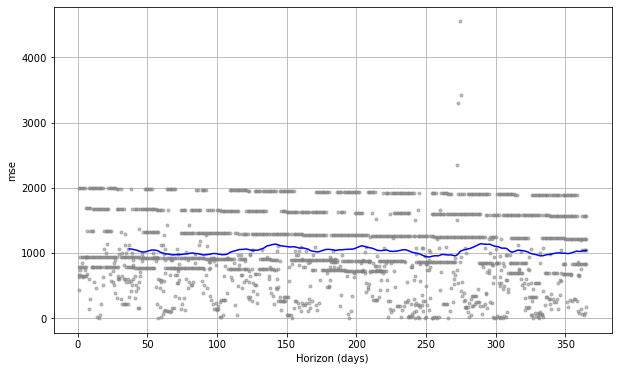

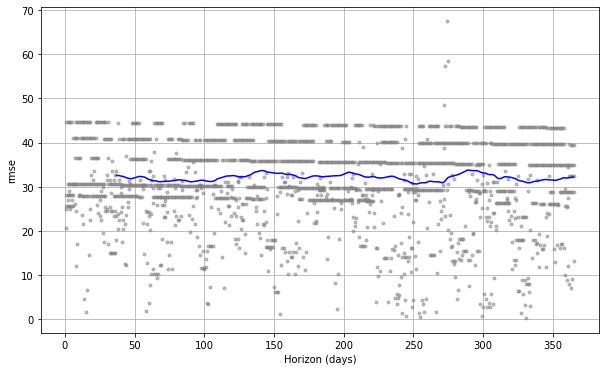

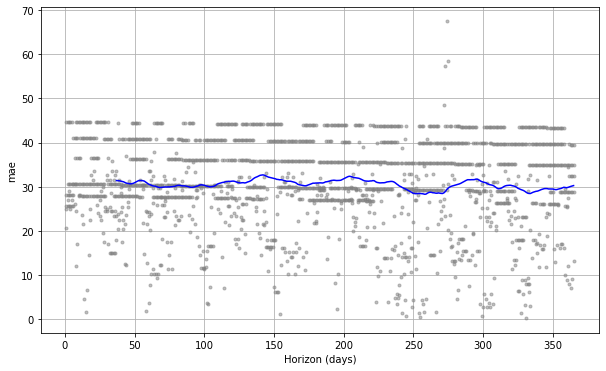

In [52]:
plt_mse = plot_cross_validation_metric(df_200_daily_logistic_cv, metric='mse')

plt_rmse = plot_cross_validation_metric(df_200_daily_logistic_cv, metric='rmse')

plt_mae = plot_cross_validation_metric(df_200_daily_logistic_cv, metric='mae')

#plt_mape = plot_cross_validation_metric(df_200_daily_logistic_cv, metric='mape')

In [53]:
r2_200_daily_logistic= r2_score(df_200_daily_logistic_cv['y'], df_200_daily_logistic_cv['yhat'])
print('R2 score for logistic model :')
r2_200_daily_logistic

R2 score for logistic model :


-10.396850301369357

## 365 days forecasting

In [54]:
future_365_logistic = m_logistic.make_future_dataframe(periods=365, freq='d', include_history = True)
future_365_logistic['cap'] = cap
future_365_logistic['floor'] = floor
forecast_365_logistic= m_logistic.predict(future_365_logistic)
forecast_365_logistic[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
59727 2022-02-24  16.238656 -172.608570  145.648845
59728 2022-02-25  16.232013 -123.116172  187.611116
59729 2022-02-26  16.225371 -124.404972  159.100248
59730 2022-02-27  16.218729 -107.054542  154.254279
59731 2022-02-28  16.212088 -119.292784  139.788431

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


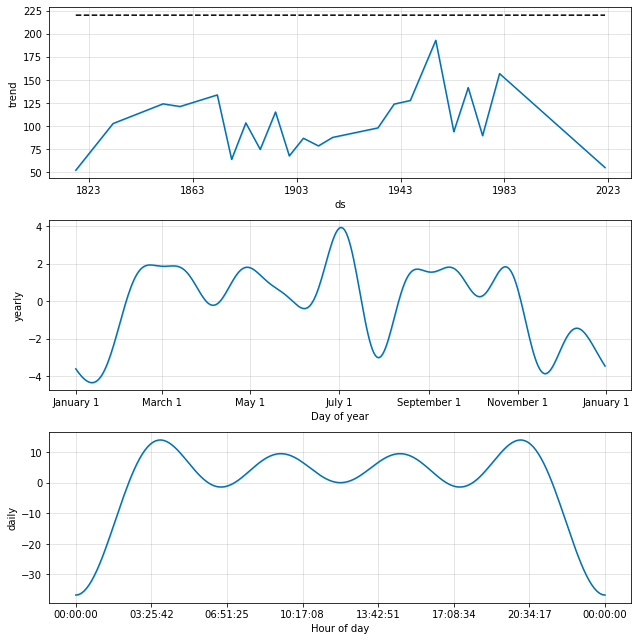

In [55]:
seasonality(df_daily_without_outlier, future_200_logistic, 'daily', 1, 4)

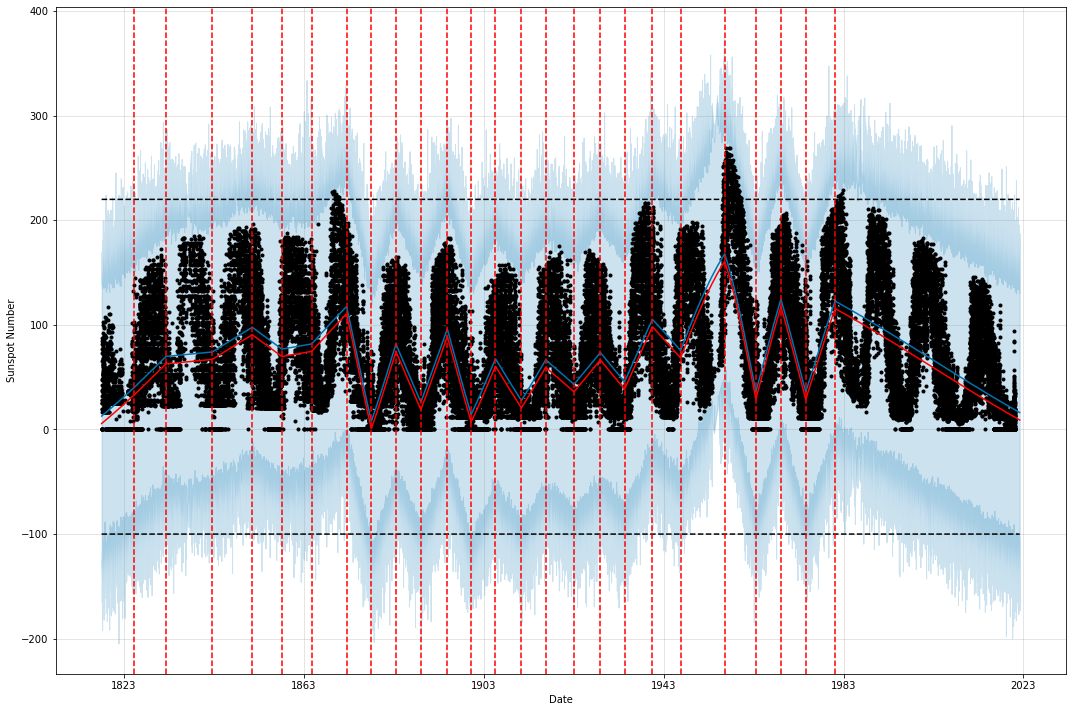

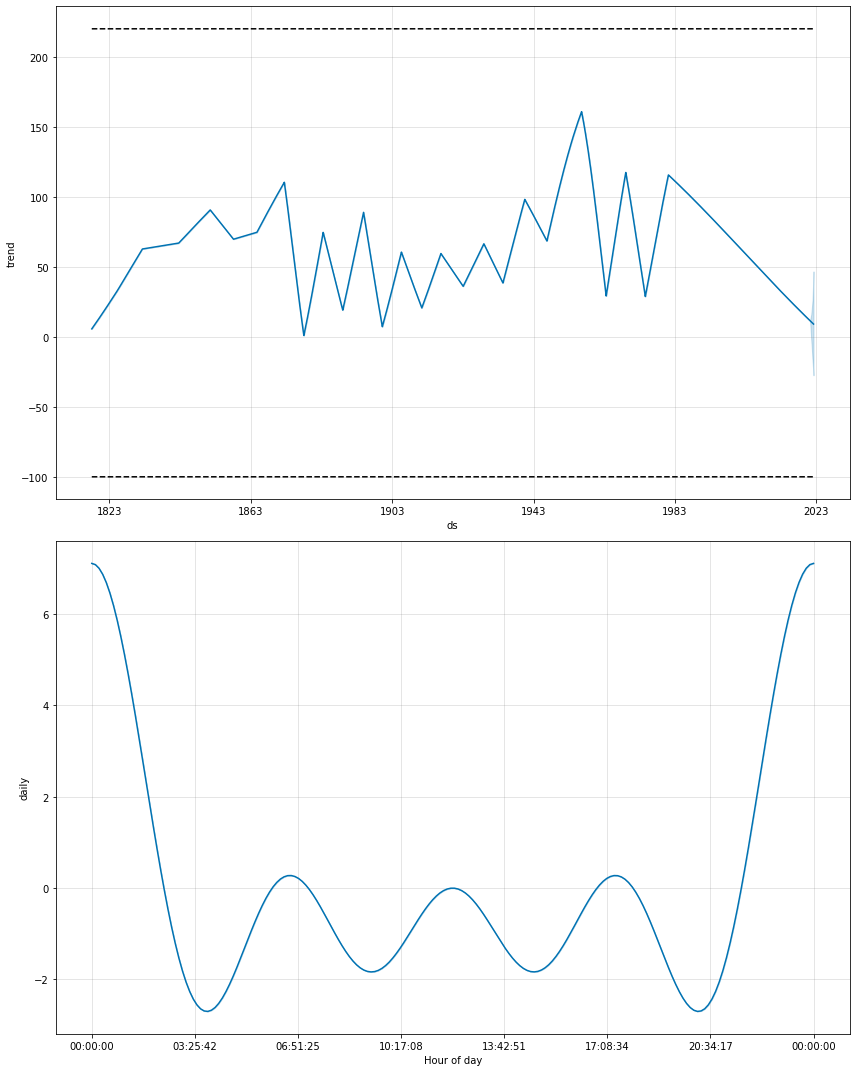

In [56]:
fig = m_logistic.plot(forecast_365_logistic, xlabel = "Date", ylabel = "Sunspot Number", figsize = (15,10))
a= add_changepoints_to_plot(fig.gca(),m_logistic,forecast_365_logistic)
fig1=m_logistic.plot_components(forecast_365_logistic, figsize=(12,15))

### Cross validation and performance metrics

In [57]:
df_365_daily_logistic_cv = cross_validation(m_logistic, initial='73500 days', period='80 days', horizon = '265 days', parallel = 'processes')

INFO:prophet:Making 6 forecasts with cutoffs between 2019-05-05 00:00:00 and 2020-06-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ffcf9160400>


In [58]:
df_365_daily_logistic_perf = performance_metrics(df_365_daily_logistic_cv)
df_365_daily_logistic_perf.head()

INFO:prophet:Skipping MAPE because y close to 0


horizon         mse       rmse        mae  mdape     smape  coverage
0 27 days  710.328693  26.651992  25.529232    inf  1.651734       1.0
1 28 days  717.387173  26.784084  25.687272    inf  1.663740       1.0
2 29 days  725.109215  26.927852  25.867326    inf  1.676267       1.0
3 30 days  734.837602  27.107888  26.094549    inf  1.694696       1.0
4 31 days  744.707473  27.289329  26.328061    inf  1.713455       1.0

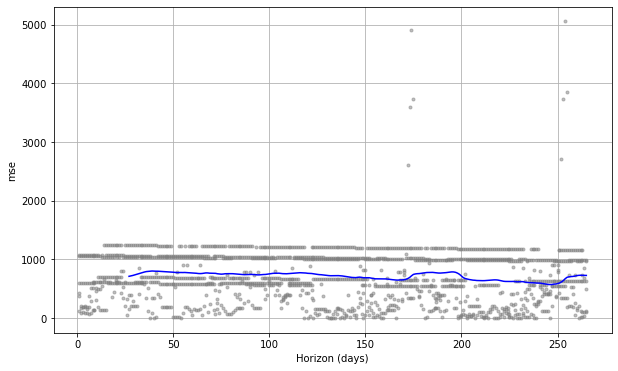

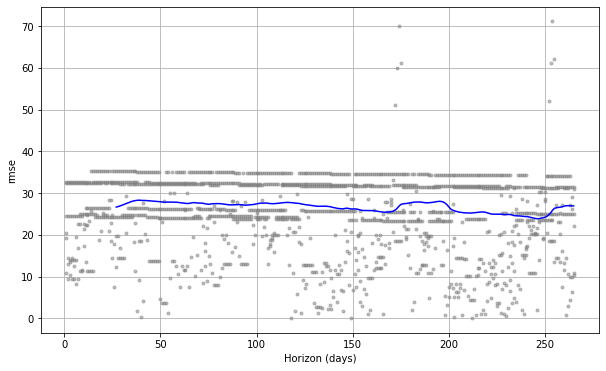

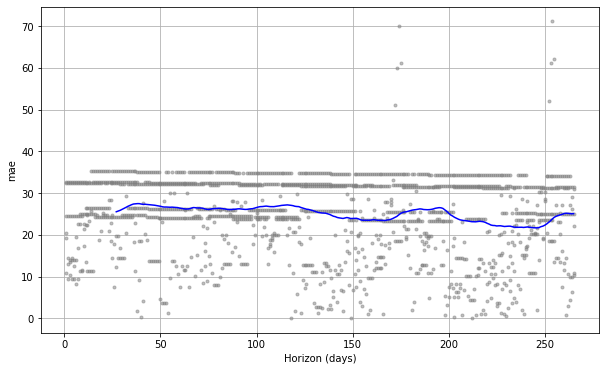

In [59]:
plt_mse = plot_cross_validation_metric(df_365_daily_logistic_cv, metric='mse')

plt_rmse = plot_cross_validation_metric(df_365_daily_logistic_cv, metric='rmse')

plt_mae = plot_cross_validation_metric(df_365_daily_logistic_cv, metric='mae')

#plt_mape = plot_cross_validation_metric(df_365_daily_logistic_cv, metric='mape')

In [60]:
r2_365_daily_logistic= r2_score(df_365_daily_logistic_cv['y'], df_365_daily_logistic_cv['yhat'])
print('R2 score for logistic model :')
r2_365_daily_logistic

R2 score for logistic model :


-5.265193292144619